In [39]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [41]:
from pandas_datareader import DataReader

In [42]:
from datetime import datetime

In [43]:
from __future__ import division

In [44]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [45]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [46]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start,end)

In [47]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,130.223321,127.193886,128.769526,128.732011,1.051453e+08,128.299738
std,10.768609,11.087040,10.855603,11.009799,4.268966e+07,11.163267
min,110.190002,103.099998,104.540001,106.839996,4.639770e+07,106.157211
25%,122.059998,118.959999,120.500000,120.709999,7.649920e+07,120.145607
50%,128.710007,126.320000,127.779999,127.349998,9.462560e+07,127.159477
75%,136.309998,133.589996,135.490005,134.779999,1.206393e+08,134.290359
max,154.979996,152.583298,152.830002,153.119995,3.326072e+08,153.119995


<AxesSubplot:xlabel='Date'>

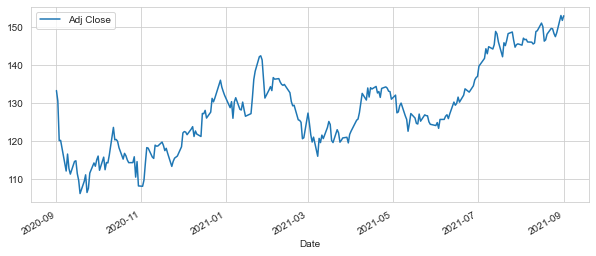

In [48]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

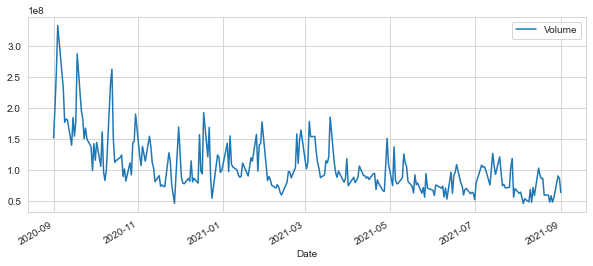

In [67]:
AAPL['Volume'].plot(legend = True, figsize = (10,4))

In [50]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.Series.rolling(AAPL['Adj Close'],ma).mean()

<AxesSubplot:xlabel='Date'>

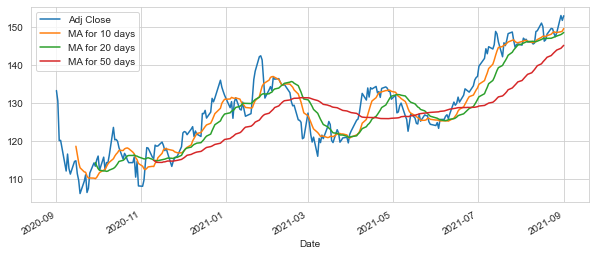

In [51]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (10,4))

<AxesSubplot:xlabel='Date'>

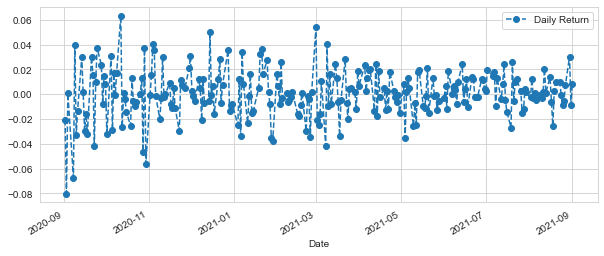

In [52]:
AAPL['Daily Return'] = AAPL ['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize = (10,4), legend = True, linestyle = '--', marker = 'o')

/home/apirl/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

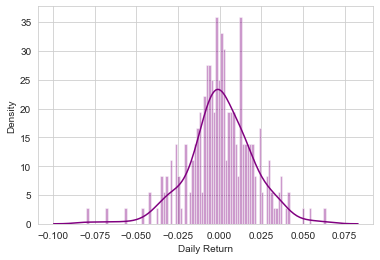

In [53]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

<AxesSubplot:>

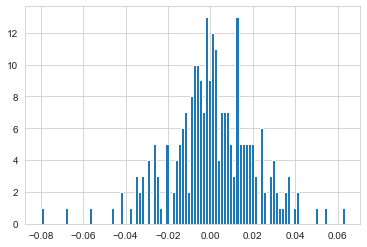

In [54]:
AAPL['Daily Return'].hist(bins = 100)

In [55]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [56]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-09-01,133.322495,1660.709961,225.203552,3499.120117
2020-09-02,130.560257,1728.280029,229.543701,3531.449951
2020-09-03,120.107483,1641.839966,215.324188,3368.000000
2020-09-04,120.186981,1591.040039,212.301926,3294.620117
2020-09-08,112.098999,1532.390015,200.817307,3149.840088


In [57]:
tech_rets = closing_df.pct_change()

In [58]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-09-01,NaN,NaN,NaN,NaN
2020-09-02,-0.020718,0.040687,0.019272,0.009239
2020-09-03,-0.080061,-0.050015,-0.061947,-0.046284
2020-09-04,0.000662,-0.030941,-0.014036,-0.021787
2020-09-08,-0.067295,-0.036863,-0.054096,-0.043944


/home/apirl/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


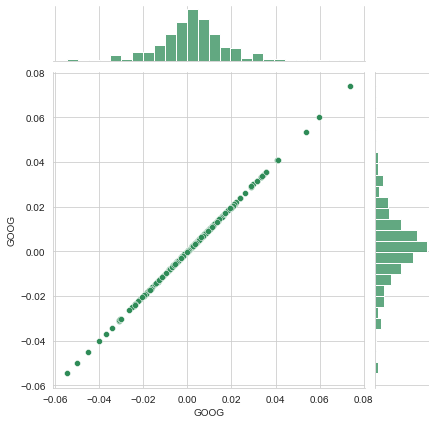

In [59]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind = 'scatter', color = 'seagreen')

/home/apirl/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


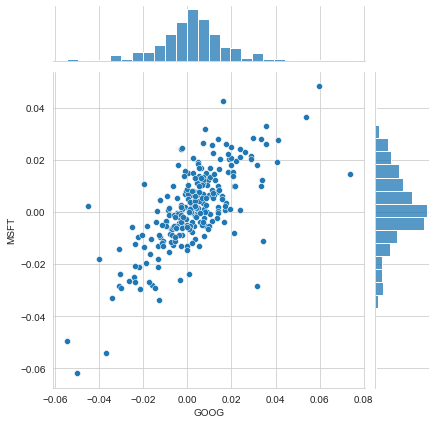

In [60]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind = 'scatter')

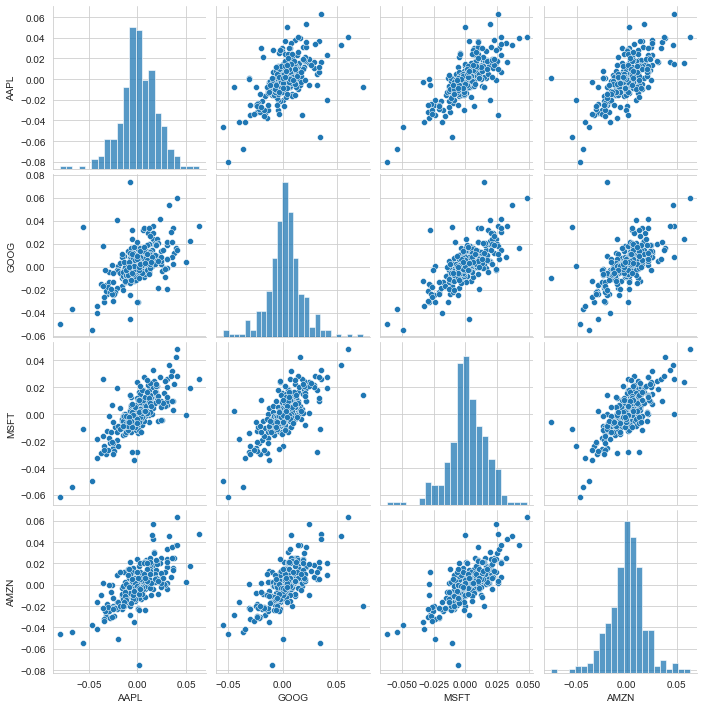

In [61]:
sns.pairplot(tech_rets.dropna())

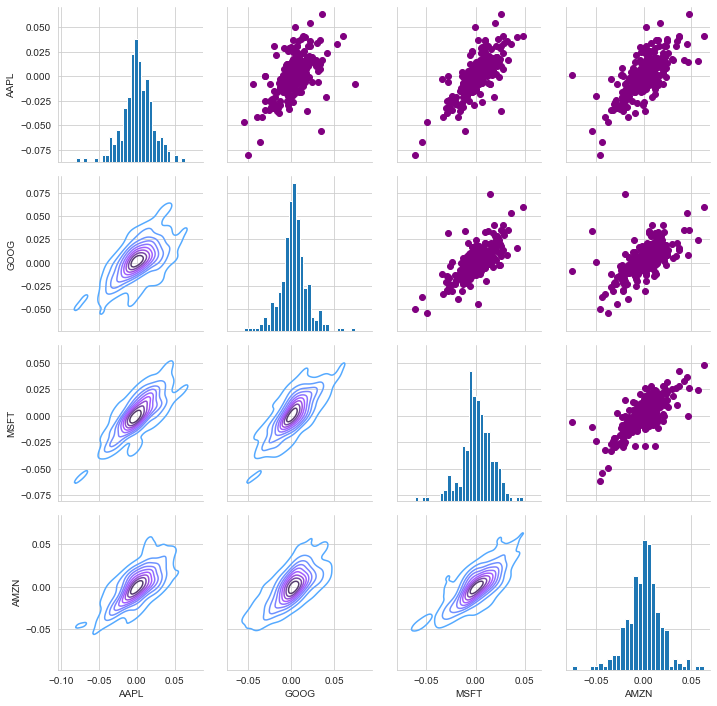

In [62]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color = 'purple')

returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

returns_fig.map_diag(plt.hist, bins = 30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

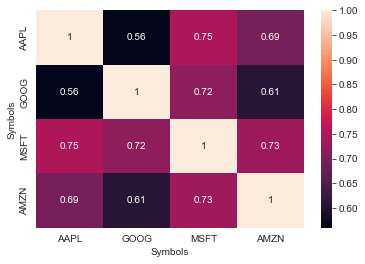

In [63]:
sns.heatmap(tech_rets.corr(), annot = True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

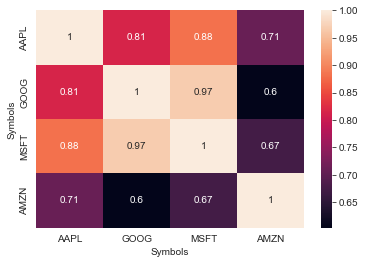

In [64]:
sns.heatmap(closing_df.corr(), annot = True)

In [65]:
rets = tech_rets.dropna()

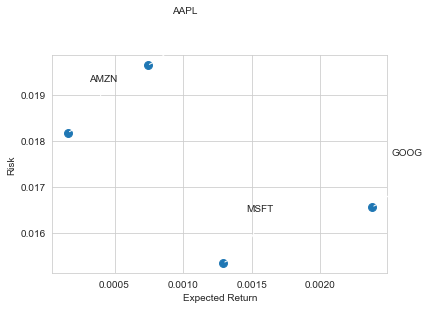

In [66]:
area = np.pi * 20
plt.scatter(rets.mean(), rets.std(), s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad = -0.3') 
    )